In [3]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from datetime import datetime

In [4]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')

In [26]:
#Data preprocessing
df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin-1")

df.replace(['nan', '', 'NAN', 'NaN'], np.nan, inplace=True)

numeric_cols = [
    'subscribers', 'video_views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank',
    'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings',
    'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days'
    'Gross_tertiary_education_enrollment_(%)', 'Population', 'Unemployment_rate', 'Urban_population',
    'Latitude', 'Longitude'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
#1. Top youtubers
output1=df.head(10)[['Youtuber', 'subscribers']]
print("1. Top 10 YouTube channels by subscribers:\n", output1)

1. Top 10 YouTube channels by subscribers:
                      Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [7]:
#2. Highes average subscribers
output2=df.groupby('category')['subscribers'].mean().idxmax()
print("Category with highest average subscribers:\n",output2)

Category with highest average subscribers:
 Shows


In [8]:
#3. Average uploads per category
output3=df.groupby('category')['uploads'].mean()
print("Average uploads per category:\n",output3)

Average uploads per category:
 category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [9]:
#4. Top countries with the highest number of YouTube channels
output4=df.groupby('Country').size().sort_values(ascending=False).head(5)
print("Top 5 countries with the highest number of YouTube channels:\n",output4)

Top 5 countries with the highest number of YouTube channels:
 Country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
dtype: int64


In [10]:
#5. Channel type distribution by category
output5=pd.crosstab(df['category'], df['channel_type'])
print("Channel type distribution by category:\n",output5)

Channel type distribution by category:
 channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      2       0          0              1     0   
Comedy                       0      0      39          0             20     1   
Education                    0      0       0         36              3     2   
Entertainment                0      1       5          2            168     6   
Film & Animation             0      0       1          2             16    17   
Gaming                       0      1       1          0             18     2   
Howto & Style                0      0       0          0              7     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             12     5   
News & Politics              0      0       0          0             

In [11]:
#6. Correlation between subscribers and video views
output6=df['subscribers'].corr(df['video views'])
print("Correlation between subscribers and video views:\n",output6)

Correlation between subscribers and video views:
 0.7481786016237689


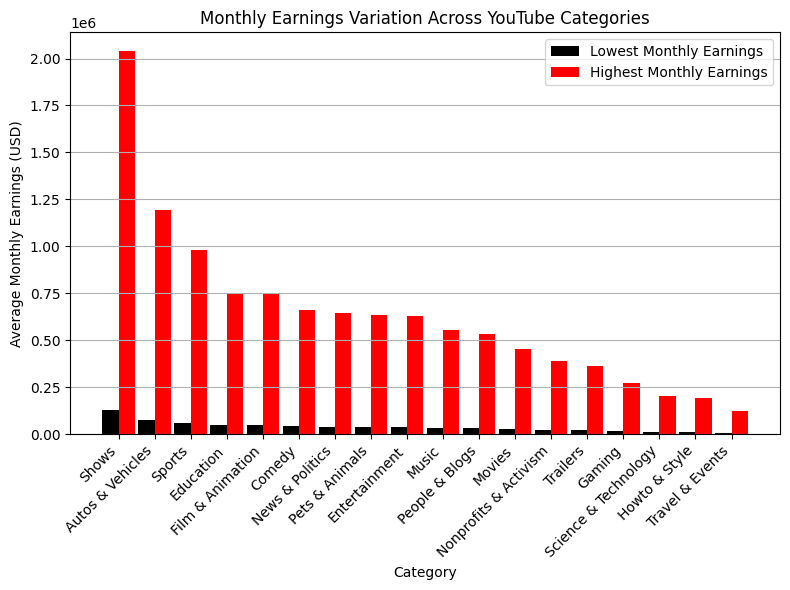

In [12]:
#7. Monthly earnings across youtbue categories
monthly_earnings_by_category = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().sort_values('lowest_monthly_earnings', ascending=False)

categories = monthly_earnings_by_category.index
lowest_earnings = monthly_earnings_by_category['lowest_monthly_earnings']
highest_earnings = monthly_earnings_by_category['highest_monthly_earnings']

bar_width = 0.45
indices = np.arange(len(categories))

plt.figure(figsize=(8,6))
plt.bar(indices, lowest_earnings, bar_width, label='Lowest Monthly Earnings', color='black')
plt.bar(indices + bar_width, highest_earnings, bar_width, label='Highest Monthly Earnings', color='red')

plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings (USD)')
plt.title('Monthly Earnings Variation Across YouTube Categories')
plt.xticks(indices + bar_width / 2, categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()


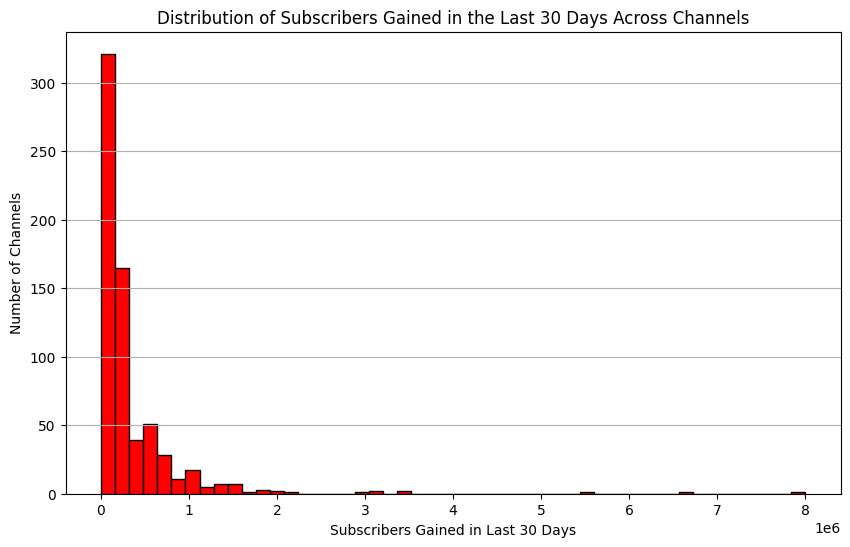

In [13]:
#8. Distribution of subscribers
plt.figure(figsize=(10,6))
plt.hist(df['subscribers_for_last_30_days'], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Subscribers Gained in the Last 30 Days Across Channels')
plt.xlabel('Subscribers Gained in Last 30 Days')
plt.ylabel('Number of Channels')
plt.grid(axis='y')
plt.show()

In [14]:
#9. Outliers
q1 = df['highest_yearly_earnings'].quantile(0.25)
q3 = df['highest_yearly_earnings'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
output9h=df[(df['highest_yearly_earnings'] > upper_bound)][['Youtuber', 'highest_yearly_earnings']]
print("Outliers with unusually high earnings in highest_yearly_earnings:\n",output9h)
output9l=df[(df['highest_yearly_earnings'] < lower_bound)][['Youtuber', 'highest_yearly_earnings']]
print("Outliers with unusually low earnings in highest_yearly_earnings:\n",output9l)


Outliers with unusually high earnings in highest_yearly_earnings:
                        Youtuber  highest_yearly_earnings
0                      T-Series              108400000.0
2                       MrBeast               64700000.0
3    Cocomelon - Nursery Rhymes               94800000.0
4                     SET India               87500000.0
6           ýýý Kids Diana Show               35100000.0
..                          ...                      ...
908                 Susy Mouriz               17700000.0
970                    _vector_               43400000.0
990               Natan por Aï¿               26500000.0
995                         WWE               34300000.0
999           Infobells - Hindi               39200000.0

[101 rows x 2 columns]
Outliers with unusually low earnings in highest_yearly_earnings:
 Empty DataFrame
Columns: [Youtuber, highest_yearly_earnings]
Index: []


Channels created by year:
 created_year
1970.0      1
2005.0     24
2006.0     93
2007.0     52
2008.0     46
2009.0     52
2010.0     48
2011.0     82
2012.0     68
2013.0     78
2014.0    100
2015.0     73
2016.0     78
2017.0     68
2018.0     46
2019.0     34
2020.0     30
2021.0     23
2022.0      5
Name: count, dtype: int64


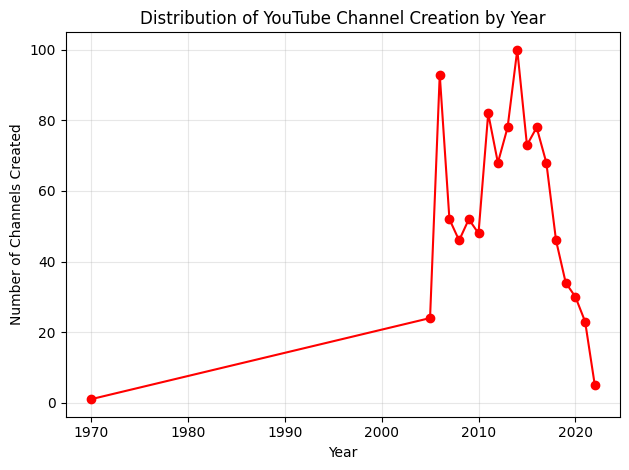

In [15]:
#10. Channel creation by year
creation_trend = df['created_year'].value_counts().sort_index(ascending=True)
print("Channels created by year:\n", creation_trend)

plt.plot(creation_trend.index, creation_trend.values, marker='o', color='red')
plt.title("Distribution of YouTube Channel Creation by Year")
plt.xlabel("Year")
plt.ylabel("Number of Channels Created")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4146661753.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


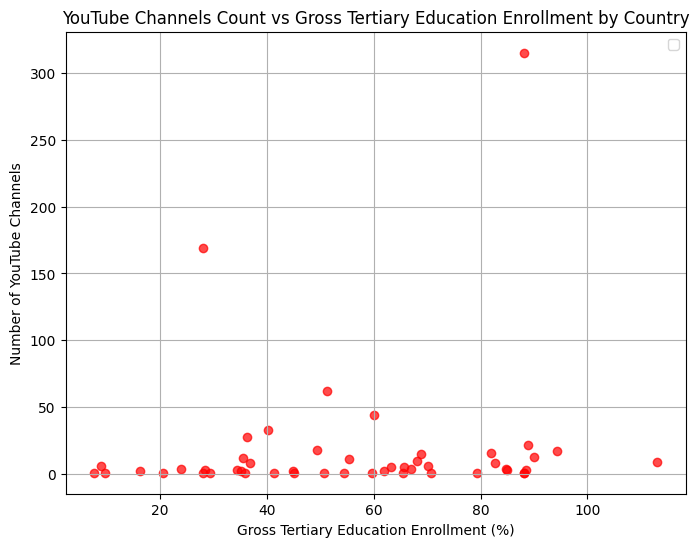

In [16]:
#11. YouTube Channels Count vs Gross Tertiary Education Enrollment by Country
channel_counts = df['Country'].value_counts()

education_enrollment = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean()

combined_df = pd.concat([channel_counts, education_enrollment], axis=1).dropna()
combined_df.columns = ['channel_count', 'education_enrollment']

plt.figure(figsize=(8,6))
plt.scatter(combined_df['education_enrollment'], combined_df['channel_count'], color='red', alpha=0.7)
plt.title('YouTube Channels Count vs Gross Tertiary Education Enrollment by Country')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.legend()
plt.grid()
plt.show()


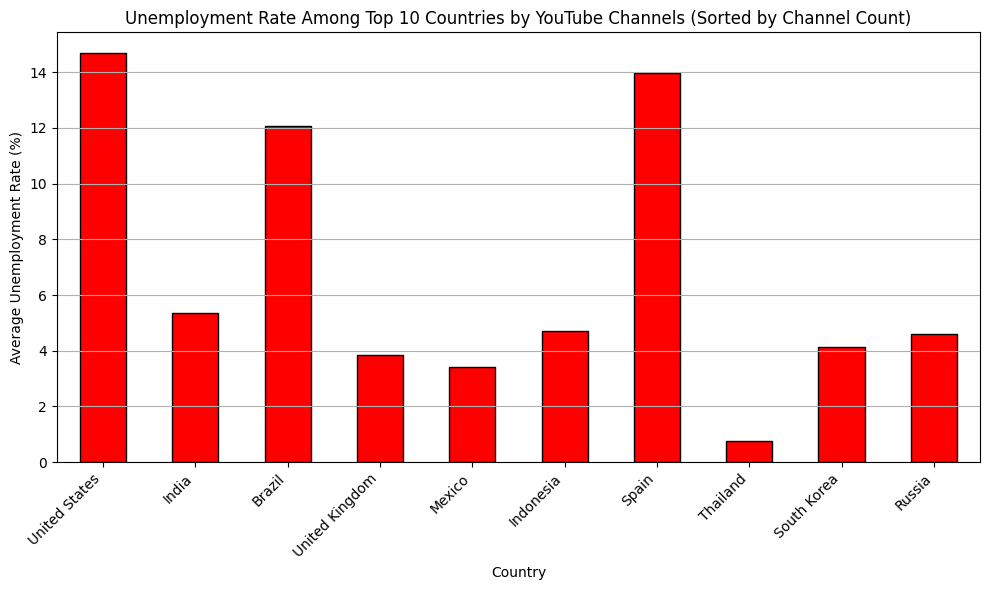

In [17]:
#12. Unemployment Rate Among Top 10 Countries by YouTube Channels (Sorted by Channel Count)
top_10_countries = df['Country'].value_counts().head(10).index

unemployment_rates = df[df['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()

unemployment_rates = unemployment_rates.loc[top_10_countries]

plt.figure(figsize=(10,6))
unemployment_rates.plot(kind='bar', color='red', edgecolor='black')

plt.title('Unemployment Rate Among Top 10 Countries by YouTube Channels (Sorted by Channel Count)')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [18]:
#13. Average urban population percentage
output13 = df['Urban_population'].mean()
print("Average urban population percentage:\n", output13)

Average urban population percentage:
 223974718.82045454


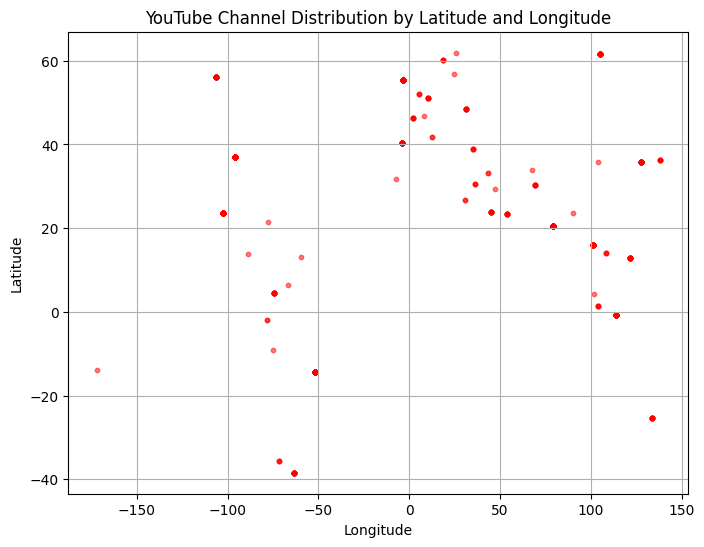

In [19]:
#14. YouTube Channel Distribution by Latitude and Longitude
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10, color='red')

plt.title('YouTube Channel Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Correlation between total subscribers and population: 0.340759532520351


/tmp/ipython-input-912186062.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


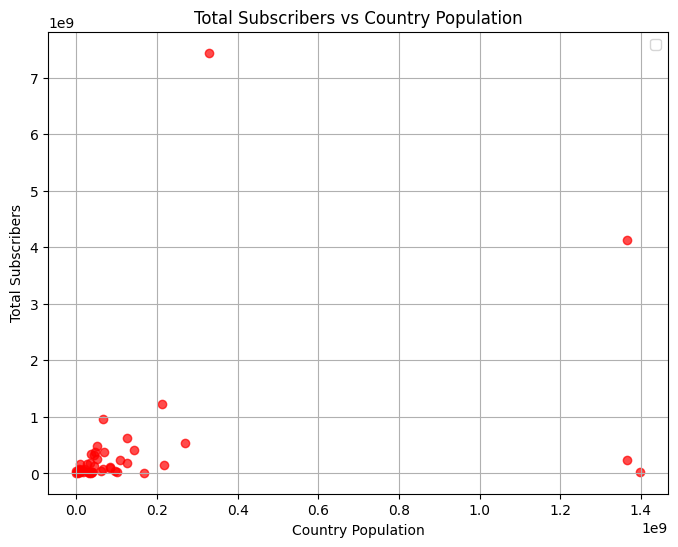

In [20]:
#15. Total subscribers vs country population
import matplotlib.pyplot as plt
import numpy as np

subs_by_country = df.groupby('Country')['subscribers'].sum()
pop_by_country = df.groupby('Country')['Population'].mean()

combined = pd.concat([subs_by_country, pop_by_country], axis=1).dropna()
combined.columns = ['total_subscribers', 'population']

correlation = combined['total_subscribers'].corr(combined['population'])
print("Correlation between total subscribers and population:", correlation)

plt.figure(figsize=(8,6))
plt.scatter(combined['population'], combined['total_subscribers'], alpha=0.7, color='red')

plt.xlabel('Country Population')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers vs Country Population')


plt.legend()
plt.grid()
plt.show()


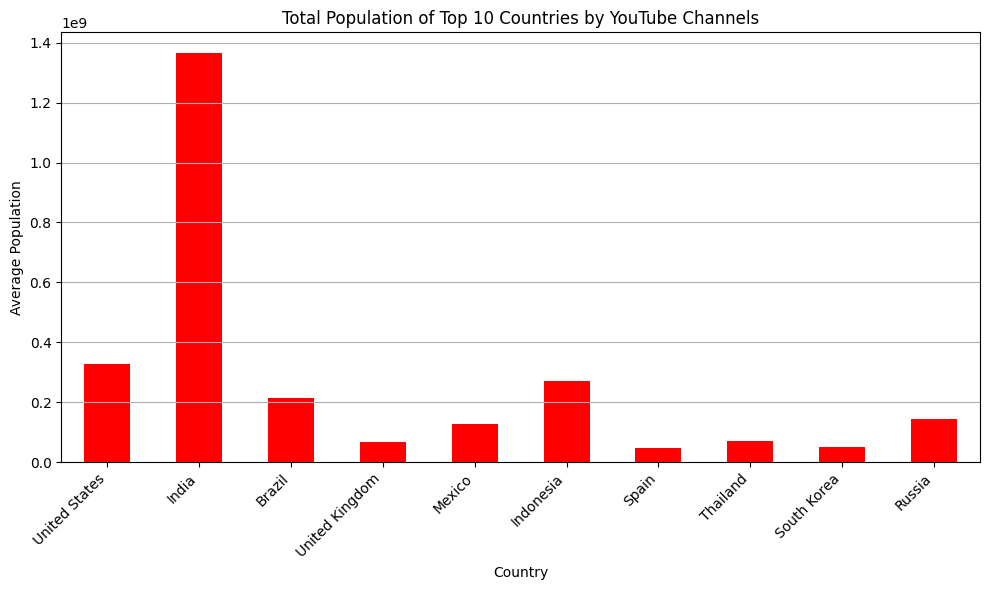

In [21]:
#16. Total Population of Top 10 Countries by YouTube Channels
top_10_countries = df['Country'].value_counts().head(10).index

population_top_10 = df[df['Country'].isin(top_10_countries)].groupby('Country')['Population'].mean()

population_top_10 = population_top_10.loc[top_10_countries]

plt.figure(figsize=(10,6))
population_top_10.plot(kind='bar', color='red')

plt.title('Total Population of Top 10 Countries by YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Population')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Correlation between subscribers gained last 30 days and unemployment rate: 0.21049865229143527


/tmp/ipython-input-3157348515.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


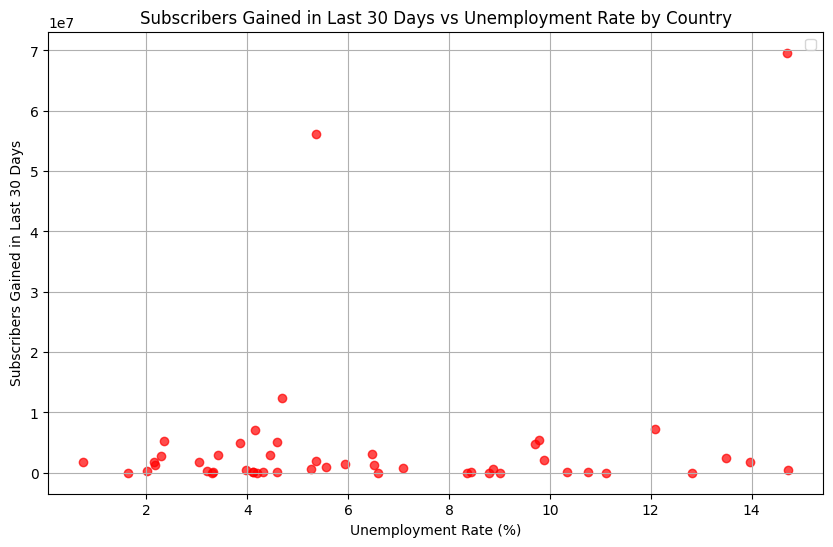

In [22]:
#17. Subscribers Gained in Last 30 Days vs Unemployment Rate by Country
subs_30d_by_country = df.groupby('Country')['subscribers_for_last_30_days'].sum()

unemployment_by_country = df.groupby('Country')['Unemployment rate'].mean()

combined = pd.concat([subs_30d_by_country, unemployment_by_country], axis=1).dropna()
combined.columns = ['subs_30d', 'unemployment']

correlation = combined['subs_30d'].corr(combined['unemployment'])
print("Correlation between subscribers gained last 30 days and unemployment rate:", correlation)

plt.figure(figsize=(10,6))
plt.scatter(combined['unemployment'], combined['subs_30d'], alpha=0.7, color='red')

plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.title('Subscribers Gained in Last 30 Days vs Unemployment Rate by Country')

plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

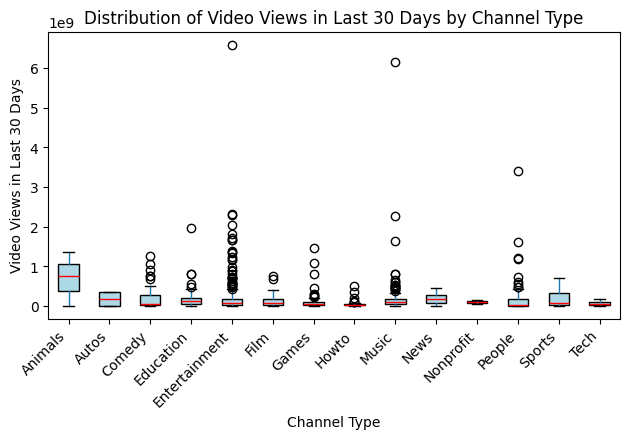

In [23]:
#18. Distribution of Video Views in Last 30 Days by Channel Type
plt.figure(figsize=(12,6))
df.boxplot(column='video_views_for_the_last_30_days', by='channel_type', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Distribution of Video Views in Last 30 Days by Channel Type')
plt.suptitle('')
plt.xlabel('Channel Type')
plt.ylabel('Video Views in Last 30 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


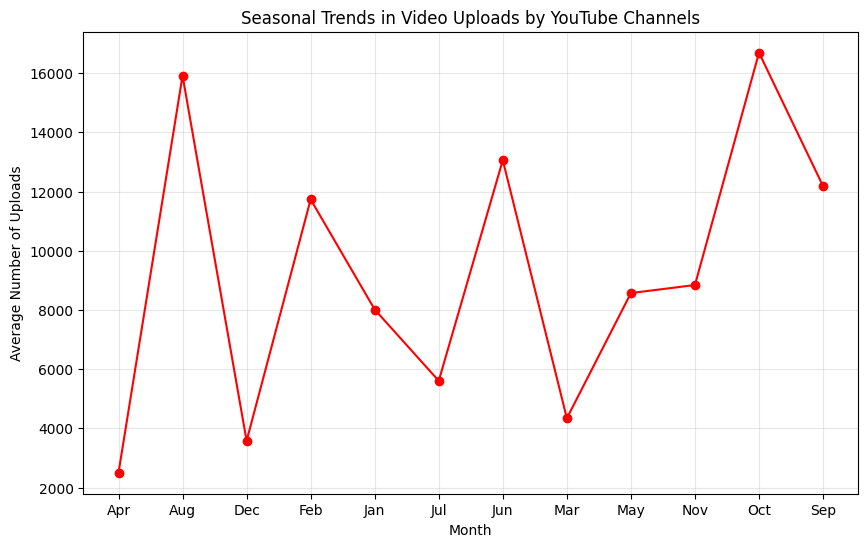

In [24]:
#19. Seasonal Trends in Video Uploads by YouTube Channels
video_upload_trend = df.groupby('created_month')['uploads'].mean()
video_upload_trend = video_upload_trend.sort_index()


plt.figure(figsize=(10,6))
plt.plot(video_upload_trend.index, video_upload_trend.values, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Average Number of Uploads')
plt.title('Seasonal Trends in Video Uploads by YouTube Channels')
plt.grid(alpha=0.3)
plt.show()

Average number of subscribers gained per month since channel creation: 168118.48635526528


/tmp/ipython-input-4226378786.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


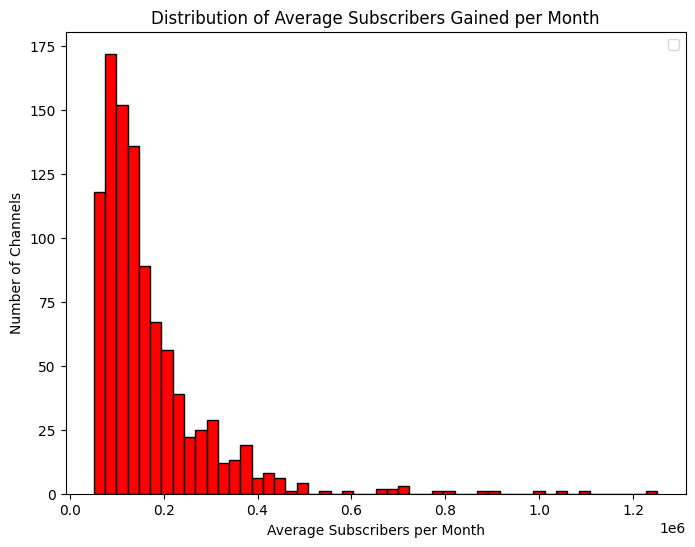

In [25]:
#20. Distribution of Average Subscribers Gained per Month
df['created_year'] = df['created_year'].astype(str).str.replace('.0', '', regex=False)
df['created_year'] = pd.to_numeric(df['created_year'], errors='coerce').astype('Int64')

df['created_month'] = df['created_month'].astype(str)
df['created_month'] = df['created_month'].replace(['nan', 'NaN', 'NAN'], pd.NA)

df['created_datetime'] = pd.to_datetime(
    df['created_year'].astype(str) + " " + df['created_month'].astype(str) + " 1",
    format='%Y %b %d',
    errors='coerce'
)

today = pd.Timestamp.today()
df['months_since_creation'] = ((today.year - df['created_datetime'].dt.year) * 12 +
                               (today.month - df['created_datetime'].dt.month))

df['months_since_creation'] = df['months_since_creation'].replace(0, 1)

df['avg_subs_per_month'] = df['subscribers'] / df['months_since_creation']

overall_avg = df['avg_subs_per_month'].mean(skipna=True)
print("Average number of subscribers gained per month since channel creation:", overall_avg)

plt.figure(figsize=(8,6))
plt.hist(df['avg_subs_per_month'].dropna(), bins=50, color='red', edgecolor='black')
plt.title("Distribution of Average Subscribers Gained per Month")
plt.xlabel("Average Subscribers per Month")
plt.ylabel("Number of Channels")
plt.legend()
plt.show()